# Assignment 3 (Part 1)

Part 1 of the third assignment is worth 25 points.

## Neural Networks

Also known as Multi-Layer-Perceptrons (MLP). Hence for this assignment you will use the MLPClassifier class from Sklearn. 

Take a look at the documentation to learn more about the default parameterisation (which activation function it uses, which optimizer/solver it uses, number and size of hidden layers, etc.) of the MLPClassifer: 

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html. 


This parctical part of the assignment is devided in 2 main tasks:


*   Training a neural network on MNIST data (3 points)
*   Training a neural networks on customer data (22 points)







### Task 1: Neural Network Classifier on MNIST 

In [ ]:
# load required libraries
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The task will be to perform classification on handwritten digits from 0 to 9 (MNIST dataset). (We've seen this dataset in the previous assignment)

In [ ]:
# download dataset from https://www.openml.org/ which contains many sample datasets for machine learning
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

**Recap**: The dataset contains 70000 examples of which each example has 784 values (pixels). These pixels are in a flat array but represent a 28 by 28 pixel gray-scale image. Values range from 0 to 255 which is common in the RGB value range. A value of 0 represents a black pixel whereas 255 represents a white pixel. Different shades of gray are any value larger than 0 but smaller than 255.

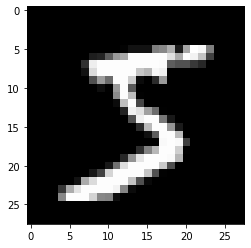

In [ ]:
# if we want to plot a single example we need to reshape the array
first_image = np.array(X[0:1], dtype='float').reshape((28, 28))
plt.imshow(first_image, cmap='gray')

#### Instructions

**You are expected to do:**


*   Data preparation: 
 *   Perform a 80/20 train/test split
 *   Perform feature scaling
*   Train the model
 *   Please use `MLPClassifier` from `sklearn.neural_network`
*   Evaluate the model performance
 *   Calculate the accuracy
 *   Plot the confusion matrix
 *   Additionally, plot some misclassified instances  (if there are any). You can use the plt.imshow() function as shown above
* Compare the model performance with the results of the softmax regression on MNIST in the previous assignment



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
x_train.shape, x_test.shape

((56000, 784), (14000, 784))

In [ ]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
classifier = MLPClassifier()
classifier.fit(x_train_scaled, y_train)

MLPClassifier()

In [ ]:
predictions = classifier.predict(x_test_scaled)
predictions.shape

(14000,)

In [ ]:
score = classifier.score(x_test_scaled, y_test)
score

0.9785714285714285

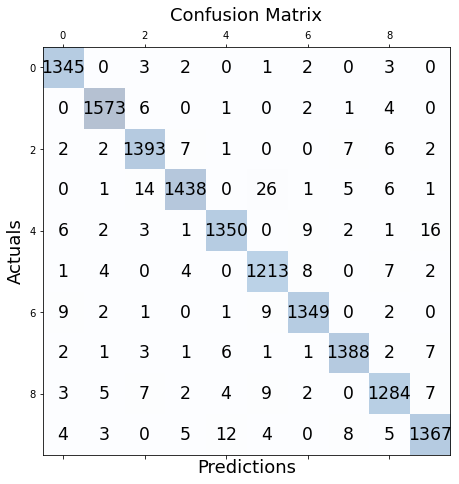

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


**Misclassified instances**

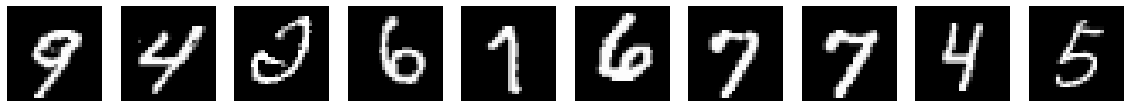

In [ ]:
f, axes = plt.subplots(1, 10, sharey=True,figsize=(20,20))
misclassified = np.where(y_test!= predictions)[0]

for i,ax in enumerate(axes.flat):

    ax.axis('off')

    ax.imshow(np.array(X[(misclassified[i]-1):(misclassified[i])], dtype='float').reshape((28, 28)), cmap='gray')


### Task 2: neural network classifier


In [55]:
# load required libraries
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
from sklearn.metrics import classification_report

#### Dataset 

This is a classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository and contains >41k records. You can find more information about the features (attributes) on the official UCI website:
https://archive.ics.uci.edu/ml/datasets/bank+marketing

The dataset gives you information about a marketing campaign of a financial institution in which can be analysed in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

The target variable is called 'deposit' which describes if a person has subscribed to a term deposit (German: "Termineinlage", more information: https://www.investopedia.com/terms/t/termdeposit.asp).

---

Your task will be to train a neural network which will be used to predict if a person will subscribe to a term deposit.

In [56]:
# Import the data
data = pd.read_csv('https://raw.githubusercontent.com/schneiderson/ATIT2-22/main/sample_data/bank.csv')
#X = data.iloc[:, :-1]
#y = data.iloc[:, -1]

X = data.copy()
print(X.shape)

(11162, 17)


#### Instructions

This task will combine a lot of different aspect of what we have discussed in class over the past weeks.

**You are expected to do:**

*   **Data exploration** (6 points):
 *   Check which features are available. 
 > *   Can some features directly be discarded?
 *   Check if data is messy (e.g. missing values)
 *   Check for correlation with target variable
 *   Look for outliers
 *   Class distribution
*   **Data preparation** (6 points):
 *   Perform some data cleaning e.g.
  >  *   Replace missing values
  >  *   Outlier handling
  >  *   Removal of duplicates
 *   Convert non-numeric features to numeric features
 *   Perform a 80/20 train/test split
 *   Perform feature scaling
 *   In case of class imbalance, think about how you want to deal with it. Please briefly explain your decision.
*   **Training and model evaluation** (10 points):
 *   Please use `MLPClassifier` from `sklearn.neural_network`
 > *   The model should have 4 hidden layers with sizes hidden_layer_size=(10, 1) (parameter hidden_layer_sizes)
 > *   Set the batch_size to 64
 *   Evaluate the model performance
 > *   Calculate the accuracy and other metrics which might be helpful to evaluate the model's performance
 > *   Based on you findings, describe some measures you could take to improve the model's performance even further.
 > *   Try to analyse if you see indications of underfitting or overfitting and which countermeasures you could take.
 *   Please train another model using one of the techniques we have discussed in the lectures and compare the performance to the performance achieved with the neural network.


**For each decision you make, briefly explain your reasoning.**



**Data exploration (6 points):**

In [ ]:
#Data exploration
print(X)

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [ ]:
#Data exploration
X.describe

<bound method NDFrame.describe of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  cam

**Data preparation (6 points):**

In [57]:
# Data exploration - drop duration
X = X.drop(['duration'], axis = 1)

In [58]:
#Data exploration - check for missing values 
X.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

--> all are zero values , so we dont have any *NaN* values in this data set

In [ ]:
#data exploration - unknown values 

print(X['contact'].value_counts()['unknown'])
print(X['poutcome'].value_counts()['unknown'])
print(X['default'].value_counts()['no'])
print(X['pdays'].value_counts()[-1])
print(X['previous'].value_counts()[0])
print(X['campaign'].value_counts()[1])
print(X['contact'].value_counts()['unknown'])

10994
8324
8324
4798
2346


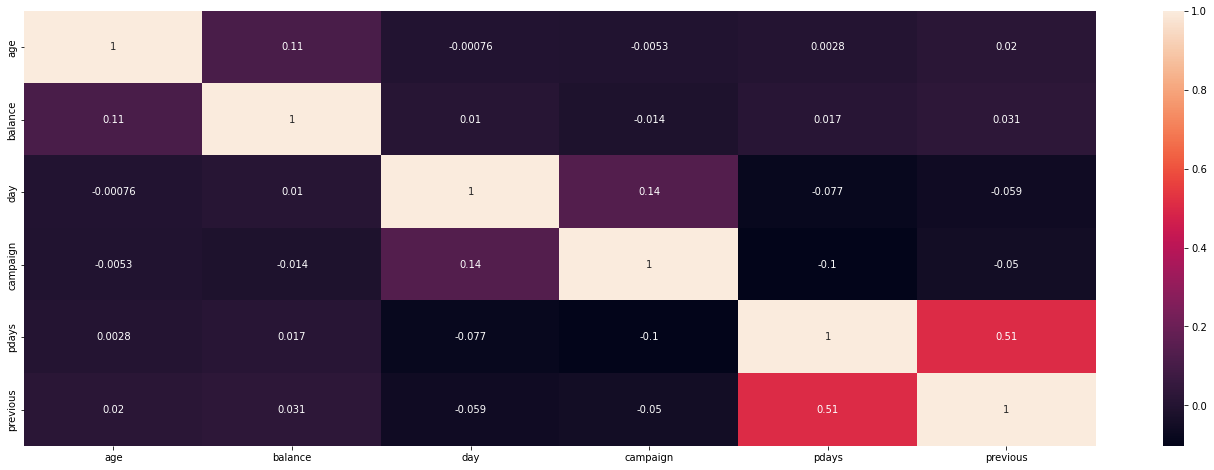

In [59]:
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(X.corr(),annot=True);

I decide to drop the feature "poutcome" because the majority of the values are declared "unknown".

I decide to change the values of the column "pdays" because of the high amount of -1 values. Now the column only contains 0 and 1 values regarding whether or not a customer has been previously contacted or not. The duration is not significant any more

I decide to drop the feature "previous" because it contains similar data like the "pdays" column and which are interesting for the model to predict the outcome --> I already transformed this column


In [60]:
defaultnew = [1]

for values in X['pdays']:
  if values == -1:
    defaultnew.append(0)
  else:
    defaultnew.append(1)
del defaultnew[0]

#add new colunm to dataset
X['pdays'] = defaultnew

#data preperation - drop
X = X.drop(['poutcome'], axis = 1)
X = X.drop(['previous'], axis = 1)

In [61]:
print(X)
print(X['pdays'].value_counts()[1])

       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  campaign  pdays  previous deposit  
0       unk

In [62]:
#Data exploration
print(X.duplicated().value_counts()) # To check duplicated values

False    11161
True         1
dtype: int64


In [63]:
#Data preperation - handling duplicates
X = X.drop_duplicates()

In [64]:
# Data preperation

lencoder = LabelEncoder()
cols = ['job', 'marital', 'education', 'default','housing', 'loan','contact', 'month','deposit']
X[cols] = X[cols].apply(LabelEncoder().fit_transform)

X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1,0,0,1
1,56,0,1,1,0,45,0,0,2,5,8,1,0,0,1
2,41,9,1,1,0,1270,1,0,2,5,8,1,0,0,1
3,55,7,1,1,0,2476,1,0,2,5,8,1,0,0,1
4,54,0,1,2,0,184,0,0,2,5,8,2,0,0,1


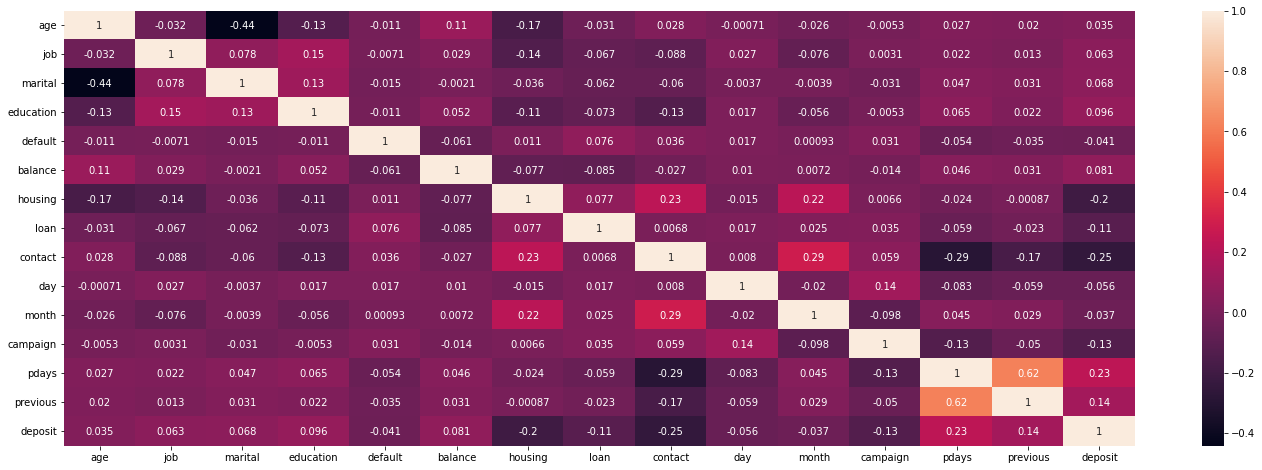

In [65]:
#Data exploration - check for correlation

plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(X.corr(),annot=True);

---

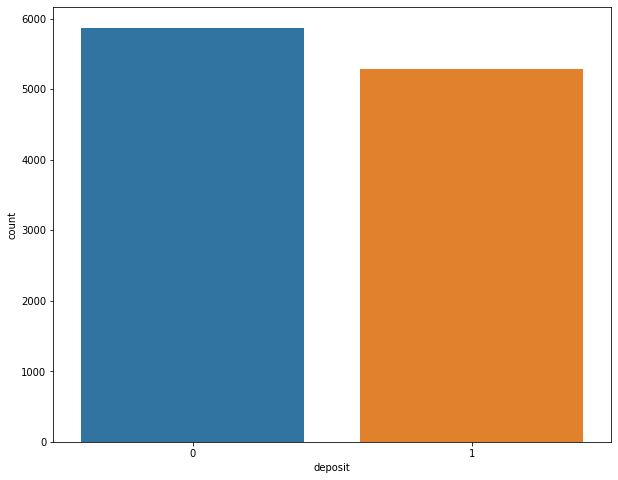

In [66]:
#Data exploration - looking for class imbalance 

import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 8)
X['deposit'].value_counts()
sns.countplot(x='deposit', data=X)
plt.show()

--> we need oversampling 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')


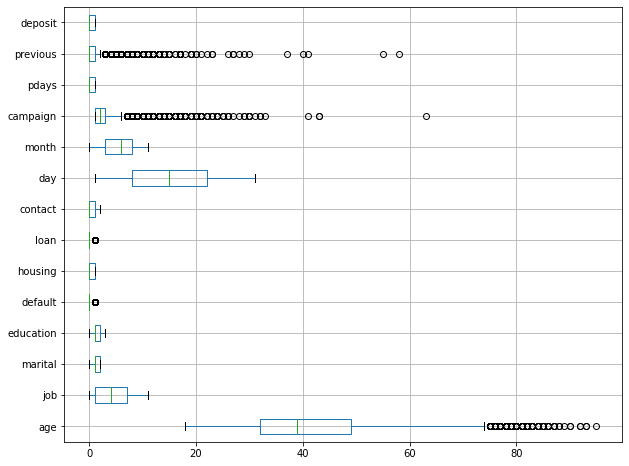

In [67]:
#Data exploration - Detect outliers using Boxplot
columnsplot = X.columns
print(columnsplot)
columnsplot = columnsplot.drop('balance')
df = pd.DataFrame(X, columns = columnsplot)
df.boxplot(vert=False)

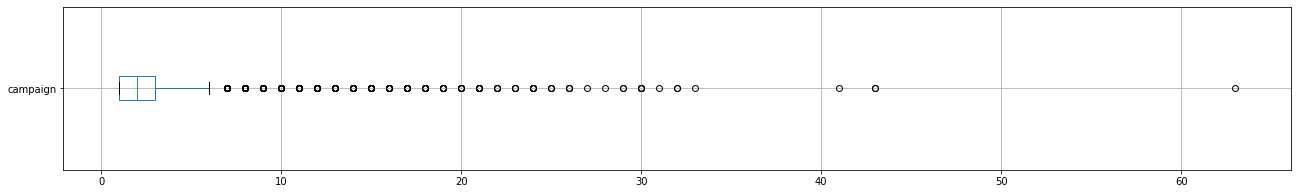

In [68]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(X, columns=['campaign'])
temp_df.boxplot(vert=False)

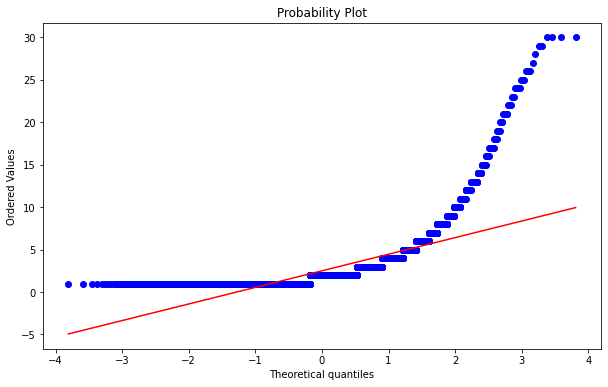

In [ ]:
import scipy.stats as stats 

plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(X['campaign'], dist="norm", plot=plt)
plt.show()

In [ ]:
print(X['balance'].shape)
print(X['campaign'].quantile(0.75))

(11161,)
3.0


For the columns "balance", "age" and "campaign", I detected outliers, which affect the outcome. 

For the "campaign" column, I decided to increase the upper limit to 30, because the values are manipulated by the high amount of values between 1 and 3

In [ ]:
# Data preperation - Handling outliers

outlier_columns = ['balance', 'age','campaign']

for columns in outlier_columns:

  Q1=X[columns].quantile(0.25)
  Q3=X[columns].quantile(0.75)

  IQR=Q3-Q1

  outliers_balance_low = (X[columns] < (Q1 - 1.5*IQR))
  if columns == 'campaign' :
    outliers_balance_up = (X[columns] > (30))
  else:
    outliers_balance_up = (X[columns] > (Q3 + 1.5*IQR))

  # drop outliers from balance and age
  X = X[~(outliers_balance_low | outliers_balance_up)]


#X=X[~((X<(Q1-1.5*IQR)) | (X>(Q3+1.5*IQR)))]

0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Name: balance, Length: 11161, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Name: age, Length: 10106, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Name: campaign, Length: 9931, dtype: bool


In [ ]:
X.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
deposit      0
dtype: int64

In [ ]:
X = X.dropna()

In [ ]:
X.shape

(9924, 14)

In [ ]:
Y = X['deposit']
X_2 = X.drop(['deposit'], axis = 1)

#Data preperation - balance class using oversampling 

oversample = RandomOverSampler(sampling_strategy='minority')
X_2, Y = oversample.fit_resample(X_2, Y)

print(X.describe())

               age          job      marital    education      default  \
count  9924.000000  9924.000000  9924.000000  9924.000000  9924.000000   
mean     40.238412     4.450222     1.209291     1.280834     0.016727   
std      10.713552     3.273000     0.627264     0.733879     0.128254   
min      18.000000     0.000000     0.000000     0.000000     0.000000   
25%      32.000000     1.000000     1.000000     1.000000     0.000000   
50%      38.000000     4.000000     1.000000     1.000000     0.000000   
75%      48.000000     7.000000     2.000000     2.000000     0.000000   
max      72.000000    11.000000     2.000000     3.000000     1.000000   

          balance      housing         loan      contact          day  \
count  9924.00000  9924.000000  9924.000000  9924.000000  9924.000000   
mean    800.91707     0.488412     0.140165     0.493047    15.587162   
std     993.42319     0.499891     0.347176     0.827603     8.453867   
min   -2049.00000     0.000000     0.0000

In [ ]:
#Data preperation - 80/20 test split

X_train, X_test, y_train, y_test = train_test_split(X_2, Y, train_size = 0.8, random_state=100)

In [ ]:
#Data preperation - scaling

scaler2 = MinMaxScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

print(X.shape)
print(X_train.shape)
print(X_train_scaled.shape)
print(y_train.shape)

(9924, 14)
(8598, 13)
(8598, 13)
(8598,)


In [ ]:
#Training and model evaluation - MLP Classifier

#The model should have 4 hidden layers with sizes hidden_layer_size=(10, 1) (parameter hidden_layer_sizes)
#Set the batch_size to 64

classifier = MLPClassifier(hidden_layer_sizes=(10,10,10,10),batch_size=(64))
classifier.fit(X_train_scaled, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=100, hidden_layer_sizes=(20, 20, 10, 10), max_iter=150)

In [ ]:
#Training and model evaluation - predictions and score

predictions = classifier.predict(X_test_scaled)
print(classifier.score(X_test_scaled, y_test))
print(classifier.predict(X_test[0:10]))

0.6776744186046512
[0 0 0 0 0 1 0 0 0 0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [ ]:
#Training and model evaluation - metrics
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1072
           1       0.67      0.70      0.69      1078

    accuracy                           0.68      2150
   macro avg       0.68      0.68      0.68      2150
weighted avg       0.68      0.68      0.68      2150



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


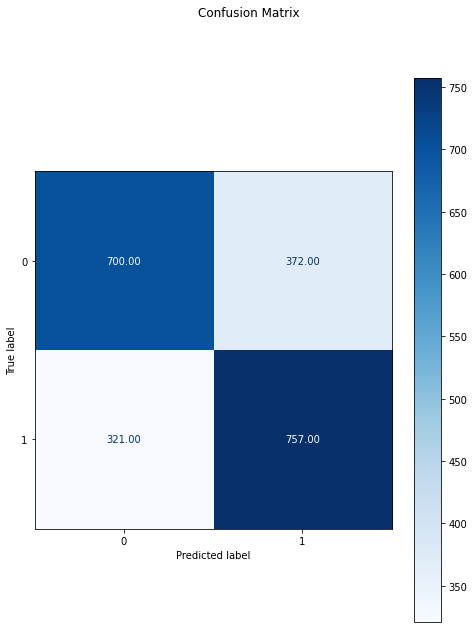

In [ ]:
#Training and model evaluation - confusion matrix

from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(classifier, X_test_scaled, y_test,display_labels=["0",'1'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix ")
plt.show()

**Improve Accuracy**

One way to improve accuaracy is to enhance a model accuracy is to add more data to train your model. Having more data is always a good idea


#### Further tips for working on the assignment:

When analyzing the model's performance, please think about what the baseline performance of the task would be and if your model performs better or not. It is quite unlikely the model will get a perfect score with the given parametrization. You can try to improve the performance by varying several hyperparameters of the model (e.g. number of hidden layers and number of neurons in a hidden layer, batch_size, training epochs, etc.). 

Please be aware that too many hidden layers and neurons and a large number of epochs will cause the model to train longer. If the model is too complex you might encounter time-outs in Colab.

If the number of epochs is too low, sklearn will show a warning that the model has not yet converged.

In [ ]:
#Training and model evaluation - training of another model 

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
predictions2 = logreg.predict(X_test_scaled)
print(logreg.score(X_test_scaled, y_test))
print(logreg.predict(X_test[0:10]))

0.6604651162790698
[1 0 1 1 1 1 1 0 1 1]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1072
           1       0.67      0.70      0.69      1078

    accuracy                           0.68      2150
   macro avg       0.68      0.68      0.68      2150
weighted avg       0.68      0.68      0.68      2150



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


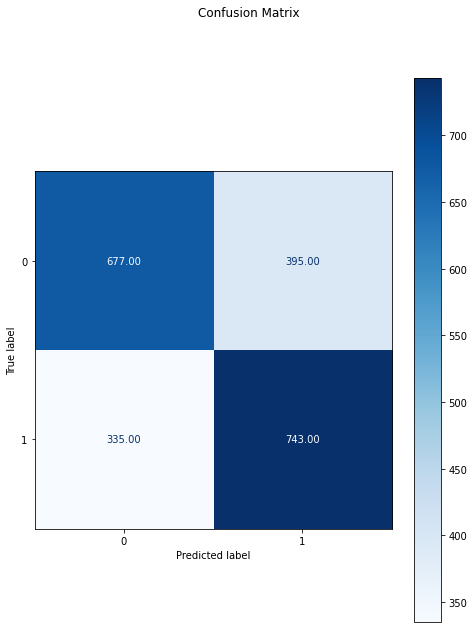

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams["figure.figsize"] = (8, 10)
fig=plot_confusion_matrix(logreg, X_test_scaled, y_test,display_labels=["0",'1'],cmap=plt.cm.Blues,values_format = '.2f')
fig.figure_.suptitle("Confusion Matrix ")
plt.show()